In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:

# Generate linear data with variance
def generate_linear_data(num_samples, slope, intercept, variance):
    x = torch.linspace(-10, 10, num_samples).view(-1, 1)
    y = slope * x + intercept + torch.randn(x.size()) * variance
    return x, y

# Define a linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Generate data
slope_true = 2.5
intercept_true = 1.0
variance = 5.0
num_samples = 100
x_data, y_data = generate_linear_data(num_samples, slope_true, intercept_true, variance)

# Create the model and optimizer
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_data)

    # Calculate loss
    loss = criterion(y_pred, y_data)

    # Backward pass and gradient update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

# Extract the slope and intercept from the trained model
slope_estimate = model.linear.weight.item()
intercept_estimate = model.linear.bias.item()
print(f"True Slope: {slope_true}, Estimated Slope: {slope_estimate}")
print(f"True Intercept: {intercept_true}, Estimated Intercept: {intercept_estimate}")

# Plot the true data and the fitted line
plt.scatter(x_data, y_data, label='True Data')
plt.plot(x_data, slope_estimate * x_data + intercept_estimate, 'r', label='Fitted Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()

***
### Using eval, torch.no_grad and GPU

Epoch [100/1000], Loss: 20.43769645690918
Epoch [200/1000], Loss: 20.417102813720703
Epoch [300/1000], Loss: 20.4167423248291
Epoch [400/1000], Loss: 20.41673469543457
Epoch [500/1000], Loss: 20.416736602783203
Epoch [600/1000], Loss: 20.41673469543457
Epoch [700/1000], Loss: 20.41673469543457
Epoch [800/1000], Loss: 20.41673469543457
Epoch [900/1000], Loss: 20.41673469543457
Epoch [1000/1000], Loss: 20.41673469543457
True Slope: 2.5, Estimated Slope: 2.5107
True Intercept: 1.0, Estimated Intercept: 0.9023


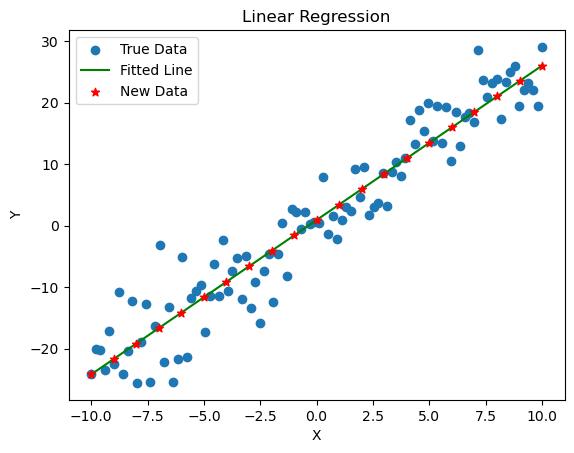

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Generate linear data with variance
def generate_linear_data(num_samples, slope, intercept, variance):
    x = torch.linspace(-10, 10, num_samples).view(-1, 1)
    y = slope * x + intercept + torch.randn(x.size()) * variance
    return x, y

# Define a linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generate data
slope_true = 2.5
intercept_true = 1.0
variance = 5.0
num_samples = 100
x_data, y_data = generate_linear_data(num_samples, slope_true, intercept_true, variance)

# Move data to the GPU if available
x_data = x_data.to(device)
y_data = y_data.to(device)

# Create the model and optimizer
model = LinearRegression().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_data)

    # Calculate loss
    loss = criterion(y_pred, y_data)

    # Backward pass and gradient update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

# Extract the slope and intercept from the trained model
slope_estimate = model.linear.weight.item()
intercept_estimate = model.linear.bias.item()
print(f"True Slope: {slope_true}, Estimated Slope: {slope_estimate:0.4f}")
print(f"True Intercept: {intercept_true}, Estimated Intercept: {intercept_estimate:0.4f}")

# Set the model to evaluation mode
model.eval()

# Generate predictions for multiple random values of x
x_news = torch.arange(-10.0,11.0,1).view(-1,1).to(device)  # Random values of x
with torch.no_grad():  # Disable gradient tracking
    y_news = model(x_news)

# for i in range(len(x_new)):
#     print(f"For x = {x_news[i].item()}, the estimated y is {y_news[i].item()}")

# Plot the true data and the fitted line
plt.scatter(x_data.cpu(), y_data.cpu(), label='True Data')
plt.plot(x_data.cpu(), slope_estimate * x_data.cpu() + intercept_estimate, 'g', label='Fitted Line', zorder=2)
plt.scatter(x_news.cpu(), y_news.cpu(), color='r', marker='*', label='New Data', zorder=3)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()

***
### Testing CNN

In [2]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:

class AlienRL(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
        )
        self.fcn = nn.Sequential(
            nn.Linear(20, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),

        )
        self.post_processor = nn.Sequential(
            nn.Linear(3136 + 64, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Tanh(),
        )

    def forward(self, obs):
        # Assume observations are a dict containing {'image': image, 'telemetry': telemetry}
        image = obs['framestack']
        telemetry = obs['telemetry']
        image_embedding = self.cnn(image)
        telemetry_embedding = self.fcn(telemetry)
        concatenated = torch.cat((image_embedding, telemetry_embedding), dim=1)
        return self.post_processor(concatenated)

In [89]:
model = AlienRL()

In [90]:
test_framestack = torch.randn(4, 3, 84, 84)
test_framestack.shape

torch.Size([4, 3, 84, 84])

In [91]:
test_telemetry = torch.randn(20)
test_telemetry.shape

torch.Size([20])

In [92]:
model.fcn(test_telemetry)[:10]

tensor([0.0000, 0.0680, 0.2163, 0.0469, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0521], grad_fn=<SliceBackward0>)

In [93]:
obs = {'framestack': test_framestack, 'telemetry': test_telemetry}

In [96]:
model.cnn(test_framestack).shape

torch.Size([4, 3136])

In [97]:
model.fcn(test_telemetry).shape

torch.Size([128])

In [94]:
model(obs)

RuntimeError: Tensors must have same number of dimensions: got 2 and 1

In [71]:
output

tensor([[0.0000, 0.0310, 0.0731,  ..., 0.0210, 0.0229, 0.0000],
        [0.1435, 0.0869, 0.1140,  ..., 0.0305, 0.0995, 0.0415],
        [0.1506, 0.0881, 0.0709,  ..., 0.1556, 0.0000, 0.0912],
        [0.1147, 0.1339, 0.0166,  ..., 0.1434, 0.0264, 0.0453]],
       grad_fn=<ReshapeAliasBackward0>)

In [70]:
output.shape

torch.Size([4, 3136])

***
### Second Attempt

In [36]:
class AlienRL(nn.Module):
    def __init__(self):
        super(AlienRL, self).__init__()

        # Convolutional layers for processing the video frames
        self.conv = nn.Sequential(
            nn.Conv2d(4, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten()
        )

        # Fully connected layers for the convolutional output
        self.fc1 = nn.Sequential(
            nn.Linear(64 * 9 * 9, 512),  # This depends on the output size of the conv layers
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU()
        )

        # Fully connected layers for the telemetry data
        self.fc2 = nn.Sequential(
            nn.Linear(20, 128),  # This depends on the number of telemetry inputs
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        # Final fully connected layers
        self.fc3 = nn.Sequential(
            nn.Linear(256 + 32, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Tanh()
        )

    def forward(self, frames, telemetry):
        frames = self.conv(frames)
        frames = self.fc1(frames)

        telemetry = self.fc2(telemetry)

        x = torch.cat((frames, telemetry), dim=1)
        x = self.fc3(x)

        return x


In [37]:
model = AlienRL()

In [40]:
test_framestack = torch.randn(1, 4, 3, 84, 84)
test_framestack.shape

torch.Size([1, 4, 3, 84, 84])

In [41]:
cnn_output = model.conv(test_framestack)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 4, 3, 84, 84]

***
### Third Attempt - Working!!!

In [7]:
def count_params(model):
    return print(f"{sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

In [4]:
class AlienRL(nn.Module):
    def __init__(self):
        super(AlienRL, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(12, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
        )
        self.fcn = nn.Sequential(
            nn.Linear(20, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
        )
        self.post_processor = nn.Sequential(
            nn.Linear(3136 + 128, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 2),
            nn.Tanh(),
        )

    def forward(self, observations):
        # Assume observations are a dict containing {'image': image, 'telemetry': telemetry}
        image = observations['image']
        telemetry = observations['telemetry']
        image_embedding = self.cnn(image)
        telemetry_embedding = self.fcn(telemetry)
        # Add an extra dimension to telemetry_embedding if it's missing
        if len(telemetry_embedding.shape) == 1:
            telemetry_embedding = telemetry_embedding.unsqueeze(0)
        concatenated = torch.cat((image_embedding, telemetry_embedding), dim=1)
        return self.post_processor(concatenated)

In [5]:
# Make sure to provide the correct observation_space and features_dim when creating an instance
model = AlienRL()

In [8]:
count_params(model)

1,917,090


In [10]:
count_params(model.cnn)

94,368


In [122]:
test_framestack = torch.randn(1, 4, 3, 84, 84)  # add a batch dimension
print(test_framestack.shape)

torch.Size([1, 4, 3, 84, 84])


In [123]:
test_framestack = test_framestack.view(1, -1, 84, 84)
print(test_framestack.shape)

torch.Size([1, 12, 84, 84])


In [124]:
test_telemetry = torch.randn(1, 20)  # add a batch dimension
print(test_telemetry.shape)

torch.Size([1, 20])


In [125]:
obs = {'image': test_framestack, 'telemetry': test_telemetry}

In [126]:
print(model.cnn(test_framestack).shape)

torch.Size([1, 3136])


In [127]:
print(model.fcn(test_telemetry).shape)

torch.Size([1, 128])


In [128]:
print(model(obs))

tensor([[ 0.0088, -0.4016]], grad_fn=<TanhBackward0>)


***
### Attempt 4 - Trying to add more to model

In [13]:
import torch
import torch.nn as nn
import numpy as np

def count_params(model):
    return print(f"{sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

In [86]:
class AlienRL(nn.Module):
    def __init__(self):
        super(AlienRL, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(12, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(3136, 1024),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(512, 128),
            nn.ReLU()
        )
        
        self.fcn1 = nn.Sequential(
            nn.Linear(20, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(128, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(p=0.2)
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(128 * 2, 512),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(256, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
            nn.Tanh(),
        )

    def forward(self, obs):
        image = obs['image']
        telemetry = obs['telemetry']

        image_embedding = self.cnn(image)
        telemetry_embedding = self.fcn1(telemetry)

        if len(telemetry_embedding.shape) == 1:
            telemetry_embedding = telemetry_embedding.unsqueeze(0)

        concatenated = torch.cat((image_embedding, telemetry_embedding), dim=1)

        return self.fc2(concatenated)

In [87]:
model = AlienRL()

In [88]:
count_params(model)

4,188,034


In [89]:
test_framestack = torch.randn(1, 4, 3, 84, 84)  # add a batch dimension
test_framestack = test_framestack.view(1, -1, 84, 84)
print(test_framestack.shape)

test_telemetry = torch.randn(1, 20)  # add a batch dimension
print(test_telemetry.shape)

torch.Size([1, 12, 84, 84])
torch.Size([1, 20])


In [90]:
obs = {'image': test_framestack, 'telemetry': test_telemetry}

In [91]:
print(model.cnn(test_framestack).shape)

torch.Size([1, 128])


In [93]:
print(model.fcn1(test_telemetry).shape)

torch.Size([1, 128])


#### Switch model to evaluation mode

In [94]:
model.eval();

In [97]:
model(obs)

tensor([[0.0866, 0.0897]], grad_fn=<TanhBackward0>)

#### Switch model back to training mode

In [82]:
model.train();

In [85]:
model(obs)

tensor([[0.0797, 0.1348]], grad_fn=<TanhBackward0>)

***

In [42]:
import torch.nn as nn
import torch.nn.functional as F

num_actions = 2

class AtariNet(nn.Module):
    def __init__(self):
        super(AtariNet, self).__init__()
        self.conv1 = nn.Conv2d(12, 32, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(7*7*64, 512)
        self.fc2 = nn.Linear(512, num_actions)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)  # flatten the tensor
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [43]:
test_data = torch.randn(1, 12, 84, 84)

In [44]:
model = AtariNet()

In [46]:
model(test_data)

tensor([[-0.0266, -0.0330]], grad_fn=<AddmmBackward0>)

***

In [52]:
import torch.nn as nn

class AtariNet2(nn.Module):
    def __init__(self):
        super(AtariNet2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(7*7*64, 512)
        self.fc2 = nn.Linear(512, num_actions)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)  # flatten the tensor
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [53]:
model = AtariNet2()

In [60]:
# Let's assume you have collected these frames and processed them to be 3x84x84
frames = [np.random.rand(3, 84, 84) for _ in range(4)]

# Convert frames to PyTorch tensors and add a batch dimension
frames = [torch.from_numpy(frame).unsqueeze(0).float() for frame in frames]

# Stack frames together along the batch dimension
input_data = torch.cat(frames, dim=0)

In [61]:
input_data.shape

torch.Size([4, 3, 84, 84])

In [65]:
input_data[0].shape

torch.Size([3, 84, 84])

In [62]:
model(input_data)

tensor([[-0.0201,  0.0085],
        [-0.0293,  0.0089],
        [-0.0301,  0.0095],
        [-0.0242,  0.0085]], grad_fn=<AddmmBackward0>)